In [8]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as sp
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import enum

## **Affine Processes**
**See full notes in "Mathematical modeling and computation in finance" Lech Grzelak  (Chapter 7)**

Stochastic models in this class can be expressed by the following stochastic differential form:
$$
\mathrm{d} \mathbf{X}(t)=\overline{\boldsymbol{\mu}}(t, \mathbf{X}(t)) \mathrm{d} t+\overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t)) \mathrm{d} \widehat{\mathbf{W}}(t), \quad 0 \leq t_0<t,
$$
where $\overline{\boldsymbol{\mu}}(t, \mathbf{X}(t)): D \rightarrow \mathbb{R}^n, \overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t)): D \rightarrow \mathbb{R}^{n \times n}$ and $\widehat{\mathbf{W}}(t)$ is a column vector of independent Brownian motions in $\mathbb{R}^n$. 

For processes in the $\mathrm{AD}$ class, it is required that drift $\bar{\mu}(t, \mathbf{X}(t))$, interest rate component $\overline{\boldsymbol{r}}(t, \mathbf{X}(t))$, and the covariance matrix $\overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t)) \overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t))^{\mathrm{T}}$ are of the affine form, i.e.
$$
\bar{\mu}(t, \mathbf{X}(t))=a_0+a_1 \mathbf{X}(t) \text {, for any }\left(a_0, a_1\right) \in \mathbb{R}^n \times \mathbb{R}^{n \times n},
$$
and
$$
\overline{\boldsymbol{r}}(t, \mathbf{X}(t))=r_0+r_1^{\mathrm{T}} \mathbf{X}(t), \text { for }\left(r_0, r_1\right) \in \mathbb{R} \times \mathbb{R}^n,
$$
and
$$
\left(\overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t)) \overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t))^{\mathrm{T}}\right)_{i, j}=\left(c_0\right)_{i j}+\left(c_1\right)_{i j}^{\mathrm{T}} \mathbf{X}_j(t),
$$
with $\left(c_0, c_1\right) \in \mathbb{R}^{n \times n} \times \mathbb{R}^{n \times n \times n}$, and where in each element in the matrix $\overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t)) \overline{\boldsymbol{\sigma}}(t, \mathbf{X}(t))^{\mathrm{T}}$ should be affine, as well as each vector element in the drift and interest rate vectors.  It is however not always trivial to verify the third condition, as it requires the analysis of the underlying covariance structure. A covariance structure is directly connected to the correlations between the driving Brownian motions.
The requirement on the interest rate process, $\bar{r}(t, \mathbf{X}(t))$ is related to the process used for discounting the asset value, for example by a stochastic interest rate process.

When the dynamics of state vector $\mathbf{X}(t)$ are affine, it can be shown that the discounted characteristic function $(\mathrm{ChF})$ is of the following form:
$$
\phi \mathbf{x}(\mathbf{u} ; t, T)=\mathbb{E}^{\mathbb{Q}}\left[\mathrm{e}^{-\int_t^T r(s) \mathrm{d} s+i \mathbf{u}^{\mathrm{T}} \mathbf{x}(T)} \mid \mathcal{F}(t)\right]=\mathrm{e}^{A(\mathbf{u}, \tau)+\overline{\mathbf{B}}^{\mathrm{T}}(\mathbf{u}, \tau) \mathbf{x}(t)},
$$
where  $\tau=T-t$, and $\bar{A}(\mathbf{u}, 0)=0$ and $\bar{B}(\mathbf{u}, 0)=i \mathbf{u}^{\mathrm{T}}$.

The coefficients $\bar{A}:=\bar{A}(\mathbf{u}, \tau)$ and $\overline{\mathbf{B}}^{\mathrm{T}}:=\overline{\mathbf{B}}^{\mathrm{T}}(\mathbf{u}, \tau)$ satisfy the following complex-valued Riccati ordinary differential equations (ODEs),
$$
\begin{aligned}
& \frac{\mathrm{d} \bar{A}}{\mathrm{~d} \tau}=-r_0+\overline{\mathbf{B}}^{\mathrm{T}} a_0+\frac{1}{2} \overline{\mathbf{B}}^{\mathrm{T}} c_0 \overline{\mathbf{B}} \\
& \frac{\mathrm{d} \overline{\mathbf{B}}}{\mathrm{d}}=-r_1+a_1^{\mathrm{T}} \overline{\mathbf{B}}+\frac{1}{2} \overline{\mathbf{B}}^{\mathrm{T}} c_1 \overline{\mathbf{B}}
\end{aligned}
$$


## **COS Expansion**
**See full notes in "Mathematical modeling and computation in finance" Lech Grzelak  (Chapter 6)**

**The method is called the COS method, as the key idea is to approximate \
the probability density function, which appears in the risk-neutral valuation \
formula, by a Fourier cosine series expansion. Fourier cosine series coefficients \
will have a closed-form relation with the characteristic function. As such, the \
COS method can be used for a quite general class of asset price processes, \
i.e. for those for which the characteristic function is available.**

Assuming that $y= X(t)$ - the underlying stochastic process and $f_X(y)$ is it's probability density function:

The density and its characteristic function, $f_X(y)$ and $\phi_X(u)$ are connected with Fourier transformation.

$$
f_X(y)=\frac{1}{2 \pi} \int_{\mathbb{R}} \mathrm{e}^{-i u y} \phi_X(u) \mathrm{d} u
$$

$$
\phi_X(u)=\int_{\mathbb{R}} \mathrm{e}^{i y u} f_X(y) \mathrm{d} y \approx \int_{a}^{b} \mathrm{e}^{i y u} f_X(y) \mathrm{d} y = \hat{\phi}_X(u)
$$

## =====================================
The general definition of the Fourier expansion of a function $g(x)$ on an interval $[-1,1]$ is as follows,
$$
g(\theta)=\sum_{k=0}^{\infty} \bar{A}_k \cos (k \pi \theta)+\sum_{k=1}^{\infty} \bar{B}_k \sin (k \pi \theta),
$$
$$
\bar{A}_k=\int_{-1}^1 g(\theta) \cos (k \pi \theta) d \theta, \quad \bar{B}_k=\int_{-1}^1 g(\theta) \sin (k \pi \theta) d \theta .
$$
(where the prime at the sum, $\Sigma^{\prime}$, indicates that the first term in the summation is weighted by one-half)

The Classical Fourier cosine expansion is when $\bar{B}_k=0$.
We can extend any function $g:[0, \pi] \rightarrow \mathbb{R}$ to become an even function on $[-\pi, \pi]$ by refecting it in an odd way

Even functions can be expressed as Fourier cosine series. For a function $\bar{g}(\theta)$ supported on $[-\pi, \pi]$, the cosine expansion reads
$$
\bar{g}(\theta)=\sum_{k=0}^{\infty} \bar{A}_k \cdot \cos (k \theta); \quad \text{where} \quad \bar{A}_k=\frac{1}{\pi} \int_{-\pi}^\pi \bar{g}(\theta) \cos (k \theta) \mathrm{d} \theta
$$
Moreover via a change of variables it can be extended to the arbitrary intrval $[a, b]$
## =====================================


$$
\operatorname{Re}\left\{\phi_X(u) \mathrm{e}^{i a}\right\}=\operatorname{Re}\left\{\int_{-\infty}^{\infty} \mathrm{e}^{i(u y+a)} f_X(y) \mathrm{d} y\right\}=\int_{-\infty}^{\infty} \cos (u y+a) f_X(y) \mathrm{d} y .
$$

We substitute the Fourier argument $u=\frac{k \pi}{b-a}$ and multiply the characteristic function by $\exp \left(-i \frac{k a \pi}{b-a}\right)$, i.e.
$$
\hat{\phi}_X\left(\frac{k \pi}{b-a}\right) \cdot \exp \left(-i \frac{k a \pi}{b-a}\right)=\int_a^b \exp \left(i y \frac{k \pi}{b-a}-i \frac{k a \pi}{b-a}\right) f_X(y) \mathrm{d} y .
$$
By taking the real part at both sides of the equation, we find:
$$
\operatorname{Re}\left\{\hat{\phi}_X\left(\frac{k \pi}{b-a}\right) \cdot \exp \left(-i \frac{k a \pi}{b-a}\right)\right\}=\int_a^b \cos \left(k \pi \frac{y-a}{b-a}\right) f_X(y) \mathrm{d} y .
$$
At the right-hand side we have the definition of $\bar{A}_k$, so
$$
\bar{A}_k \equiv \frac{2}{b-a} \operatorname{Re}\left\{\phi_{X} \left(\frac{k \pi}{b-a}\right) \cdot \exp \left(-i \frac{k a \pi}{b-a}\right)\right\} \text {. }
$$
It follows from that $\bar{A}_k \approx \bar{F}_k$ with
$$
\bar{F}_k:=\frac{2}{b-a} \operatorname{Re}\left\{\hat{\phi_X}\left(\frac{k \pi}{b-a}\right) \cdot \exp \left(-i \frac{k a \pi}{b-a}\right)\right\} .
$$

$$
f_X(y) \approx \hat{f}_X(y) \approx \sum_{k=0}^{\infty} \bar{F}_k \cos \left(k \pi \frac{y-a}{b-a}\right) \approx \sum_{k=0}^{N-1} \bar{F}_k \cos \left(k \pi \frac{y-a}{b-a}\right) .
$$
#### **Remarks:**
**(The first term in every sum $\mathbf{\sum}$ should be multiplied by $\mathbf{\frac{1}{2}}$ !!!)** \
**See how to choose an integration range and examples of characteristic functions in Lech Grzelak "Mathematical modeling and computation in finance" Chapter 6 (Section 6.2.4)**



## **FX-HLMM**
#### **Cross-currency model with correlation between the FX and interest rates (provides "Interest rate smile")**
**See full notes in "Mathematical modeling and computation in finance" Lech Grzelak  (Chapter 15, Section 15.3)**

$$
\left\{\begin{aligned}
\mathrm{d} y(t) / y(t) & =\left( \cdots \right) \mathrm{d} t+\sqrt{v(t)} \mathrm{d} W_y^{\mathbb{Q}}(t) \\
\mathrm{d} v(t) & =\kappa(\bar{v}-v(t)) \mathrm{d} t+\gamma \sqrt{v(t)} \mathrm{d} W_v^{\mathbb{Q}}(t)
\end{aligned}\right.
$$

$$
\left\{\begin{array}{c}
\mathrm{d} \ell_{\mathrm{d}, i}(t)=\nu_{\mathrm{d}, i} \xi_{\mathrm{d}, i}(t) \sqrt{\nu_{\mathrm{d}}(t)}\left(\mu_{\mathrm{d}}(t) \sqrt{\nu_{\mathrm{d}}(t)} \mathrm{d} t+\mathrm{d} W_i^{\mathrm{d}, T}(t)\right) \\
\mathrm{d} \nu_{\mathrm{d}}(t)=\lambda_{\mathrm{d}}\left(\nu_{\mathrm{d}}\left(t_0\right)-\nu_{\mathrm{d}}(t)\right) \mathrm{d} t+\eta_{\mathrm{d}} \sqrt{\nu_{\mathrm{d}}(t)} \mathrm{d} W_v^{\mathrm{d}, T}(t)
\end{array}\right.
$$

$$
\left\{\begin{array}{c}
\mathrm{d} \ell_{\mathrm{f}, i}(t)=\nu_{\mathrm{f}, i} \xi_{\mathrm{f}, i}(t) \sqrt{\nu_{\mathrm{f}}(t)}\left(\mu_{\mathrm{f}}(t) \sqrt{\nu_{\mathrm{f}}(t)} \mathrm{d} t+\mathrm{d} W_i^{\mathrm{f}, T}(t)\right) \\
\mathrm{f} \nu_{\mathrm{f}}(t)=\lambda_{\mathrm{f}}\left(\nu_{\mathrm{f}}\left(t_0\right)-\nu_{\mathrm{f}}(t)\right) \mathrm{d} t+\eta_{\mathrm{f}} \sqrt{\nu_{\mathrm{f}}(t)} \mathrm{d} W_v^{\mathrm{f}, T}(t)
\end{array}\right.
$$

$$
\mu_{\mathrm{d}}(t)=-\sum_{k=i+1}^m \frac{\tau_k \xi_{\mathrm{d}, k}(t) \nu_{\mathrm{d}, k}}{1+\tau_k \ell_{\mathrm{d}, k}(t)} \rho_{i, k}^{\mathrm{d}}, \quad \mu_{\mathrm{f}}(t)=-\sum_{k=i+1}^m \frac{\tau_k \xi_{\mathrm{f}, k}(t) \nu_{\mathrm{f}, k}}{1+\tau_k \ell_{\mathrm{f}, k}(t)} \rho_{i, k}^{\mathrm{f}}
$$
where
$$
\left\{\begin{array}{l}
\xi_{\mathrm{d}, i}=\vartheta_{\mathrm{d}, i}^* \ell_{\mathrm{d}, i}(t)+\left(1-\vartheta_{\mathrm{d}, i}^*\right) \ell_{\mathrm{d}, i}\left(t_0\right) \\
\xi_{\mathrm{f}, i}=\vartheta_{\mathrm{f}, i}^* \ell_{\mathrm{f}, i}(t)+\left(1-\vartheta_{\mathrm{f}, i}^*\right) \ell_{\mathrm{f}, i}\left(t_0\right)
\end{array}\right.
$$

The following correlation structure is imposed: $\newline$
$\newline$

FX and its variance process, $v(t)$ :  $\quad \mathrm{d} W_y^T(t) \mathrm{d} W_v^T(t)=\rho_{y, v} \mathrm{~d} t \newline$

FX and domestic Libor rates, $\ell_{\mathrm{d}, i}(t)$ : $\quad \mathrm{d} W_y^T(t) \mathrm{d} W_i^{\mathrm{d}, T}(t)=\rho_{y, i}^{\mathrm{d}} \mathrm{d} t \newline$

FX and foreign Libor rates, $\ell_{\mathrm{f}, i}(t)$ : $\quad \mathrm{d} W_y^T(t) \mathrm{d} \widehat{W}_i^{\mathrm{f}, T}(t)=\rho_{y, i}^{\mathrm{f}} \mathrm{d} t \newline$

Libor rates in the domestic market: $\quad \mathrm{d} W_i^{\mathrm{d}, T}(t) \mathrm{d} W_i^{\mathrm{d}, T}(t)=\rho_{i, j}^{\mathrm{d}} \mathrm{d} t \newline$

Libor rates in the foreign market: $\quad \mathrm{d} \widehat{W}_i^{\mathrm{f}, T}(t) \mathrm{d} \widehat{W}_j^{\mathrm{f}, T}(t)=\rho_{i, j}^{\mathrm{f}} \mathrm{d} t \newline$

Libor rates in dom. \& foreign markets: $\quad \mathrm{d} W_i^{\mathrm{d}, T}(t) \mathrm{d} \widehat{W}_j^{\mathrm{f}, T}(t)=\rho_{i, j}^{\mathrm{d}, \mathrm{f}} \mathrm{d} t$

FX-rate under T-forward domestic measure.

$$
\begin{aligned}
\frac{\mathrm{d} y_F(t, T)}{y_F(t, T)}= & \sqrt{v(t)} \mathrm{d} W_y^T(t)+\sqrt{\nu_{\mathrm{d}}(t)} \sum_{k=\bar{m}(t)+1}^m \frac{\tau_k \nu_{\mathrm{d}, k} \xi_{\mathrm{d}, k}(t)}{1+\tau_k \ell_{\mathrm{d}, k}(t)} \mathrm{d} W_k^{\mathrm{d}, T}(t) \\
& -\sqrt{\nu_{\mathrm{f}}(t)} \sum_{k=\bar{m}(t)+1}^m \frac{\tau_k \nu_{\mathrm{f}, k} \xi_{\mathrm{f}, k}(t)}{1+\tau_k \ell_{\mathrm{f}, k}(t)} \mathrm{d} W_k^{\mathrm{f}, T}(t)
\end{aligned}
$$

**This process is not affine so we make an affine approximation:**
- **Freeze libor rates:** $$ l_{j,k}(t) \approx l_{j,k}(t_0) \Rightarrow \xi_{j,k} = l_{j,k}(t_0); \text{  where } j = d,f$$
- **Perform logarithmic transformation** $X(t) = \log y_F (t, T)$
- **Linearize non-affine terms in the drift of $X(t)$**
- **Solving the system of Ricatti ODEs to find terms in Characteristic function**

**See full proccess in  "Mathematical modeling and computation in finance" Lech Grzelak  (Section 15.3.1)**

### **The formulas for the characteristic function: (some of them are in a form of pictures)**

$$
\phi_X (u;t;T) = \exp\left[\bar{A}(u, \tau) + \bar{B}(u, \tau) X(t) + \bar{C}(u, \tau)v(t) + \bar{D}_d(\tau) \nu_d(t) + \bar{D}_f(\tau) \nu_f(t)\right]
$$

#### **1.** 
$$ \bar{B}(u, \tau) = iu $$

#### **2.** 
$$ \bar{C}(u, \tau) = \frac{1 - e^{-d \tau}}{\gamma^2 (1- ge^{-d \tau})} (\kappa - \rho_{y,v} \gamma iu - d) $$

$$ g = \frac{\kappa - \gamma\rho_{y,v}iu - d}{\kappa - \gamma\rho_{y,v}iu + d}  \quad \quad d = \sqrt{(\gamma\rho_{y,v}iu - \kappa)^2 - \gamma^2 iu (iu -1)}$$

#### **3. This functions are calculated iteratively**

$$ \text{initital conditions: } \bar{D}_d (u, 0) = 0, \quad \bar{D}_f (u, 0) = 0, \quad \bar{A}(u, 0) = 0$$

$$ \bar{D}_j (u, \tau_{k}) = \bar{D}_j (u, \tau_{k-1}) + \chi_j(u, \tau_k); \quad \text{ where  } j = f, d $$

$$ \bar{A}(u, \tau_{k}) = \bar{A}(u, \tau_{k-1}) + \chi_A (u, \tau_k) - \frac{1}{2} (u^2 + u) \int_{\tau_{k-1}}^{\tau_k} G(z)dz $$

#### **3.1 Internal  functions for $ \bar{A}$ and $ \bar{D_j} $:**

![title](img/pic1.png)

where $ \mathrm{A} = {\bar{m}(t)+1, \cdots m}, \bar{m}(t) = \min(k: t \leq T_k) $



$$ G(t) = \varsigma \left( t, \mathrm{E}(\sqrt{v(t)}), \mathrm{E}(\sqrt{v_d(t)}), \mathrm{E}(\sqrt{v_f(t)})  \right) \approx \varsigma \left( t, \sqrt{v(t)}, \sqrt{v_d(t)}, \sqrt{v_f(t)}  \right) $$

#### **Internal  functions for $ G(t)$ $:**

![title](img/pic2.png)

### =======================

# **!! ERRATUM !!** 
### **There is definetely some error in implementation of the Characteristic function below**

In [9]:
def B(u):
    return complex(0,1) * u

def C(tau, u, kappa, Rxv, gamma):
    iu = B(u)
    d = np.sqrt((Rxv*gamma*iu - kappa)**2 - iu*(iu + 1)*gamma**2)
    temp = np.exp(- d * tau)
    g = (kappa - gamma*Rxv*iu - d) / (kappa - gamma*Rxv*iu + d)
    return (1 - temp) * (kappa - Rxv*gamma*iu - d) / gamma**2 / (1 - g*temp)


""" Internal functions for computing D() and A() """

def Chi(D_j, lamda_j, delta_j, eta_j, l_j, dt):
    return (lamda_j - delta_j - eta_j**2 * D_j) * (1 - np.exp(-delta_j*dt)) / (eta_j**2 * (1 - l_j*np.exp(-delta_j*dt)))

def Delta(lamda_j, eta_j, A_j, u):
    ui = B(u)
    return np.sqrt(lamda_j**2 + eta_j**2 * A_j * (u**2 + ui))

def l_j(lamda_j, delta_j, eta_j, D_j):
    return (lamda_j - delta_j - eta_j**2 * D_j) / (lamda_j + delta_j - eta_j**2 * D_j) 


def Psi_j(dt, nu_j, L0_j):
    # constant in case of equal dt and nu_j (our case)
    return dt*nu_j*L0_j / (1 + dt*L0_j)

def A_j(t, dt, M, Rd_ij, nu_j, L0_j):
    n = M - t // dt
    psi = Psi_j(dt, nu_j, L0_j)
    res = n*psi**2 + (n-1)*psi**2 * Rd_ij
    return res

def ChiA(u, tau, dt, kappa, V_bar, gamma, Ryv, nu_d, nu_f, lambda_d, lambda_f, eta_d, eta_f, delta_d, delta_f, l_d, l_f):
    dk = np.sqrt((Ryv*gamma*B(u) - kappa)**2 + gamma**2 * (B(u) + u**2))
    gk = ((kappa - Ryv*gamma*B(u)) - dk - gamma**2 * C(tau, u, kappa, Ryv, gamma)) / ((kappa - Ryv*gamma*B(u)) + dk - gamma**2 * C(tau, u, kappa, Ryv, gamma))
    val1 = kappa*V_bar / gamma**2 * ( (kappa-Ryv*gamma*B(u)-dk)*dt - 2*np.log((1-gk*np.exp(-dk*dt)) / (1-gk)))
    val2 = nu_d*lambda_d / eta_d**2 * ( (lambda_d-delta_d)*dt - 2*np.log((1-l_d*np.exp(-delta_d*dt)) / (1-l_d)))
    val3 = nu_f*lambda_f / eta_f**2 * ( (lambda_f-delta_f)*dt - 2*np.log((1-l_f*np.exp(-delta_f*dt)) / (1-l_f)))
    return val1+val2+val3

def meanSqrtV_3(t, kappa ,v0 ,vbar ,gamma):
    delta = 4.0 *kappa*vbar/gamma/gamma
    c = lambda t: 1.0/(4.0*kappa)*gamma*gamma*(1.0-np.exp(-kappa*(t)))
    kappaBar = 4.0*kappa*v0*np.exp(-kappa*t)/(gamma*gamma*(1.0-np.exp(-kappa*t)))
    return np.sqrt(2.0*c(t)) * sp.gamma((1.0+delta)/2.0)/sp.gamma(delta/2.0)*sp.hyp1f1(-0.5,delta/2.0,-kappaBar/2.0)


""" Characteristic function """

def CHF(u, M, dt, V0, lambda_d, lambda_f, eta_f, eta_d, Rd_ij, Rf_ij, nu_d, nu_f, L0_d, L0_f, kappa, V_bar, gamma, Ryv, Rd_yk, Rf_yk, Rdf_ij):
    count = 1
    A = 0
    Dd = 0
    Df = 0
    Ad = A_j(0, dt, M, Rd_ij, nu_d, L0_d)
    Af = A_j(0, dt, M, Rf_ij, nu_f, L0_f)

    delta_d = Delta(lambda_d, eta_d, Ad, u)
    delta_f = Delta(lambda_f, eta_f, Af, u)

    l_d = l_j(lambda_d, delta_d, eta_d, Dd)
    l_f = l_j(lambda_f, delta_f, eta_f, Df)

    
    while count < M:
        Dd += Chi(Dd, lambda_d, delta_d, eta_d, l_d, dt)
        Df += Chi(Df, lambda_f, delta_f, eta_f, l_f, dt)

        chi_A = ChiA(u, (M-count)*dt, dt, kappa, V_bar, gamma, Ryv, nu_d, nu_f, lambda_d, lambda_f, eta_d, eta_f, delta_d, delta_f, l_d, l_f)
        
        # calculating G
        var = lambda t: meanSqrtV_3(t, kappa, V0, V_bar, gamma)
        var_d = lambda t: meanSqrtV_3(t, lambda_d, nu_d, nu_d, eta_d)
        var_f = lambda t: meanSqrtV_3(t, lambda_f, nu_f, nu_f, eta_f)
        ab = lambda t: var(t)*var_d(t)*(M-count)*Rd_yk*Psi_j(dt, nu_d, L0_d)
        ac = lambda t:var(t)*var_f(t)*(M-count)*Rf_yk*Psi_j(dt, nu_f, L0_f)
        bc = lambda t:var_d(t)*var_f(t)*(M-count)**2 * Psi_j(dt, nu_f, L0_f)*Psi_j(dt, nu_d, L0_d)*Rdf_ij
        G = lambda t: 2*ab(t) - 2*ac(t) - 2*bc(t)
        
        # bad integral approximation of G(t)!!!
        A += chi_A - 0.5* (u**2 + u) + (G(count*dt) + G(count*dt + dt))/2
        count +=1
    
        Ad = A_j(0, dt, M, Rd_ij, nu_d, L0_d)
        Af = A_j(0, dt, M, Rf_ij, nu_f, L0_f)

        delta_d = Delta(lambda_d, eta_d, Ad, u)
        delta_f = Delta(lambda_f, eta_f, Af, u)

        l_d = l_j(lambda_d, delta_d, eta_d, Dd)
        l_f = l_j(lambda_f, delta_f, eta_f, Df)

    return np.exp(A + C(M*dt, u, kappa, Ryv, gamma)*V0 + Dd*nu_d + Df*nu_f)


## **Pricing Options** (via COS method)

$$
V(t_0, x) = e^{-r\tau} \int_{\mathrm{R}} V(T, y) f_{X} (y) dy \approx V_{\mathrm{I}}\left(t_0, x\right)
$$

- **Replacing probability density function with the cosine expansion**
$$
V_{\mathrm{I}}\left(t_0, x\right)=\mathrm{e}^{-r \tau} \int_a^b V(T, y) \sum_{k=0}^{+\infty} \bar{A}_k(x) \cos \left(k \pi \frac{y-a}{b-a}\right) \mathrm{d} y .
$$

- **Interchanging the summation and integration, and replacing the payoff by the cosine expansion also**
$$
V_{\mathrm{I}}\left(t_0, x\right)=\frac{b-a}{2} \mathrm{e}^{-r \tau} \cdot \sum_{k=0}^{+\infty} \bar{A}_k(x) \cdot H_k .
$$

$$
H_k:=\frac{2}{b-a} \int_a^b V(T, y) \cos \left(k \pi \frac{y-a}{b-a}\right) \mathrm{d} y
$$

Where the $H_k$ are the cosine series coefficients $V(T, y)$.

- **Truncating the series summation**
$$
V_{\mathrm{II}}\left(t_0, x\right)=\frac{b-a}{2} \mathrm{e}^{-r \tau} \cdot \sum_{k=0}^{N-1} \bar{A}_k(x) H_k .
$$

- **Replacing the coefficients $\bar{A}_k(x)$ by approximation $\bar{F}_k(x)$**

$$
V\left(t_0, x\right) \approx V_{\mathrm{III}}\left(t_0, x\right)=\mathrm{e}^{-r \tau} \sum_{k=0}^{N-1} \operatorname{Re}\left\{\phi_X\left(\frac{k \pi}{b-a}\right) \exp \left(-i k \pi \frac{a}{b-a}\right)\right\} \cdot H_k,
$$
with $\tau=T-t_0$ and $x$ a function of $S\left(t_0\right)$ (like $x=\log \left(S\left(t_0\right)\right)$ or $x=$ $\left.\log \left(S\left(t_0\right) / K\right)\right)$, and the characteristic function
$$
\phi_X(u)=\phi_X\left(u ; t_0, T\right) \equiv \phi_X\left(u, x ; t_0, T\right),
$$
as the characteristic function also depends on variable $x$.

## **Payoff coefficients**

$$
V(T, y):=\left[\bar{\alpha} \cdot K\left(\mathrm{e}^y-1\right)\right]^{+} \quad \text { with } \quad \bar{\alpha}= \begin{cases}1 & \text { for a call }, \\ -1 & \text { for a put }\end{cases}
$$
where the notation $[h(y)]^{+}$ denotes "max $\left.[h(y), 0\right]$ ". And where $y = \frac{S(T)}{K}$ \
\
**Before deriving the $H_k$-coefficients, we need two basic results:**

- **The cosine series coefficients, $\chi_k$, of $g(y)=\mathrm{e}^y$ on an integration interval $[c, d] \subset[a, b]$**,
$$
\chi_k(c, d):=\int_c^d \mathrm{e}^y \cos \left(k \pi \frac{y-a}{b-a}\right) \mathrm{d} y =
$$
$$

\begin{aligned}
& = \frac{1}{1+\left(\frac{k \pi}{b-a}\right)^2}\left[\cos \left(k \pi \frac{d-a}{b-a}\right) \mathrm{e}^d-\cos \left(k \pi \frac{c-a}{b-a}\right) \mathrm{e}^c\right. \\
& \left.+\frac{k \pi}{b-a} \sin \left(k \pi \frac{d-a}{b-a}\right) \mathrm{e}^d-\frac{k \pi}{b-a} \sin \left(k \pi \frac{c-a}{b-a}\right) \mathrm{e}^c\right]
\end{aligned}
$$

- **The cosine series coefficients, $\psi_k$, of $g(y)=1$ on an integration interval $[c, d] \subset[a, b]$**
$$
\psi_k(c, d):=\int_c^d \cos \left(k \pi \frac{y-a}{b-a}\right) \mathrm{d} y = \begin{cases}{\left[\sin \left(k \pi \frac{d-a}{b-a}\right)-\sin \left(k \pi \frac{c-a}{b-a}\right)\right] \frac{b-a}{k \pi},} & k \neq 0, \\ (d-c), & k=0 .\end{cases}
$$
are known analytically.

Focusing on a call option, in the case that $a<0<b$, we obtain
$$
\begin{aligned}
H_k^{c a l l} & =\frac{2}{b-a} \int_0^b K\left(\mathrm{e}^y-1\right) \cos \left(k \pi \frac{y-a}{b-a}\right) \mathrm{d} y \\
& =\frac{2}{b-a} K\left(\chi_k(0, b)-\psi_k(0, b)\right),
\end{aligned}
$$

Similarly, for a vanilla put, we find
$$
H_k^{\text {put }}=\frac{2}{b-a} K\left(-\chi_k(a, 0)+\psi_k(a, 0)\right) .
$$

In [10]:
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0

"""Internal"""
def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi}
    return value


"""Determine coefficients for put prices""" 
def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:                  
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k      = 2.0 / (b - a) * (Chi_k - Psi_k)  
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (- Chi_k + Psi_k)          
    return H_k   


"""Solution via COS method"""
def CallPutOptionPriceCOSMthd_StochIR(cf,CP,S0,tau,K,N,L,P0T):
    """
    cf   - Characteristic function as a functon, in the book denoted by \varphi
    CP   - C for call and P for put
    S0   - Initial stock price
    tau  - Time to maturity
    K    - List of strikes
    N    - Number of expansion terms
    L    - Size of truncation domain (typ.:L=8 or L=10)
    P0T  - Zero-coupon bond for maturity T.
    """

    # Reshape K to become a column vector
    if K is not np.array:
        K = np.array(K).reshape([len(K),1])

    i = complex(0.0,1.0) 
    x0 = np.log(S0 / K)   

    # Truncation domain
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)
    
    # Summation from k = 0 to k=N-1
    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a)  

    # Determine coefficients for put prices  
    H_k = CallPutCoefficients(OptionType.PUT,a,b,k)   
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u) * H_k 
    temp[0] = 0.5 * temp[0]
    value = K * np.real(mat.dot(temp))     
    
    # We use the put-call parity for call options
    if CP == OptionType.CALL:
        value = value + S0 - K * P0T
    return value

#### Running

In [11]:
def get_strikes(frwd,Ti):
    c_n = np.array([-1.5, -1.0, -0.5,0.0, 0.5, 1.0, 1.5])
    return frwd * np.exp(0.1 * c_n * np.sqrt(Ti))
   
TiV = [0.5, 1.0, 5.0, 10.0, 20.0, 30.0]
strikesM = np.zeros([len(TiV),7])

# Market ZCBs for domestic and foreign markets
P0T_d = lambda t: np.exp(-0.02 * t)
P0T_f = lambda t: np.exp(-0.05 * t)

# Spot of the FX rate
y0 = 1.35
for (idx,ti) in enumerate(TiV):
    frwd = y0 * P0T_f(ti) / P0T_d(ti)
    strikesM[idx,:] = get_strikes(frwd,ti)

pd.DataFrame(strikesM, 
             index=["0.5Y", "1.0Y", "5.0Y", "10.0Y", "20.0Y", "30.0Y"], 
             columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])

,K1,K2,K3,K4,K5,K6,K7
0.5Y,1.196067,1.239111,1.283703,1.329901,1.377761,1.427344,1.478711
1.0Y,1.127615,1.185429,1.246207,1.310101,1.377272,1.447886,1.522121
5.0Y,0.830850,0.929134,1.039044,1.161956,1.299407,1.453118,1.625011
10.0Y,0.622360,0.728970,0.853842,1.000105,1.171422,1.372086,1.607124
20.0Y,0.378812,0.473734,0.592442,0.740896,0.926549,1.158723,1.449074
30.0Y,0.241357,0.317392,0.417381,0.548869,0.721781,0.949165,1.248182


Text(0.5, 1.0, 'Fx Option prices')

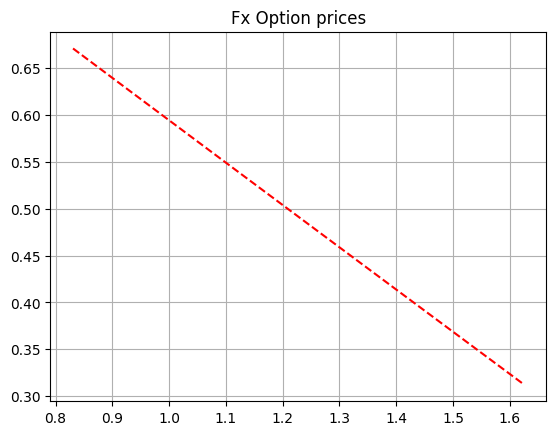

In [12]:
CP  = OptionType.CALL  
T = 5.0

# NoOfPaths = 10000
# NoOfSteps = (int)(T*50)

# Settings for the COS method
N = 500
L = 8

# Market settings
L0_d = 0.02
L0_f = 0.05
P0Td = lambda t: np.exp(-L0_d*t)
P0Tf = lambda t: np.exp(-L0_f*t)
y0      = 1.35
frwdFX  = y0*P0Tf(T)/P0Td(T)
kappa   = 0.5
gamma   = 0.3
V_bar    = 0.1
V0      = 0.1

# Libor model parameter settings
M = 50
dt = T/M

lambda_d  = 1
lambda_f  = 0.7
eta_d    = 0.1
eta_f    = 0.2
nu_f = 0.25
nu_d = 0.15

# Correlations
Ryv   = -0.4
Rd_yk  = -0.15
Rf_yk  = -0.15
Rd_ij  = 0.9
Rf_ij  = 0.7
Rdf_ij = 0.25

# Strike prices
K = get_strikes(frwdFX,T)
K = np.array(K).reshape([len(K),1])

# Value from the COS method
cf = lambda u: CHF(u, M, dt, V0, lambda_d, lambda_f, eta_f, eta_d, Rd_ij, 
                   Rf_ij, nu_d, nu_f, L0_d, L0_f, kappa, V_bar, gamma, Ryv, Rd_yk, Rf_yk, Rdf_ij)

valCOS_H1HW = P0Td(T)*CallPutOptionPriceCOSMthd_StochIR(cf, CP, frwdFX, T, K, N, L,1.0)

plt.figure(1)
plt.plot(K,valCOS_H1HW,'--r')
plt.grid()
plt.title("Fx Option prices")

### Implied Volatility

/tmp/ipykernel_2921/1826216880.py:5: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))
/tmp/ipykernel_2921/1826216880.py:5: RuntimeWarning: invalid value encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))


Text(0.5, 1.0, 'Fx Implied volatilities')

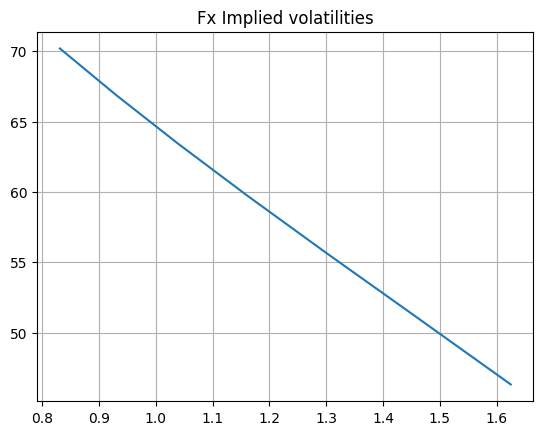

In [13]:
""" Black-Scholes call option price """
def BS_Call_Put_Option_Price(CP,S_0,K,sigma,tau,r):
    if K is list:
        K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) 
    * tau) / (sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S_0
    return value

""" Implied volatility method """
def implied_vol(CP,marketPrice,K,T,S_0):
    # To determine the initial volatility we define a grid for sigma
    # and interpolate on the inverse function
    sigmaGrid = np.linspace(0.0,5.0,5000)
    optPriceGrid = BS_Call_Put_Option_Price(CP,S_0,K,sigmaGrid,T,0.0)
    sigmaInitial = np.interp(marketPrice,optPriceGrid,sigmaGrid)
    # print("Strike = {0}".format(K))
    # print("Initial volatility = {0}".format(sigmaInitial))

    # Use already determined input for the local-search (final tuning)
    func = lambda sigma: np.power(BS_Call_Put_Option_Price(CP,S_0,K,sigma,T,0.0) - marketPrice, 1.0)
    impliedVol = optimize.newton(func, sigmaInitial, tol=1e-15)
    # print("Final volatility = {0}".format(impliedVol))
    if impliedVol > 2.0:
        impliedVol = 0.0
    return impliedVol

# Implied volatilities
IVCos =np.zeros([len(K),1])
for (idx,k) in enumerate(K):
    priceCOS = valCOS_H1HW[idx]/P0Td(T) 
    IVCos[idx] = implied_vol(CP,priceCOS ,k,T,frwdFX)*100.0

plt.figure(2)
plt.plot(K,IVCos)
plt.grid()
plt.title("Fx Implied volatilities")